In [642]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 폰트
plt.rcParams['font.family'] = 'Malgun Gothic' # For Windows

In [643]:
# 깐부들
# plt.title()
# plt.xlabel()
# plt.ylabel()
# plt.tight_layout()
# plt.show()

In [644]:

# plt.title("제목")
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.tight_layout()
# plt.show()

## 그래프를 읽는 기본 문법

그래프를 그리기 전에, 그래프가 전달하는 정보를 읽는 법부터 잡는다.

- x축: 비교 기준이 무엇인지
- y축: 측정하는 값이 무엇인지
- 하나의 점이나 막대: 관측값 하나인지, 여러 관측값을 요약한 값인지
- 색상이나 범례: 어떤 그룹을 나눴는지
- 축의 단위: 원인지, 명인지, 비율인지, 퍼센트인지

### ▸ 수치형(Numeric)

- **이산형(Discrete)**: 셀 수 있는 정수 값(0,1,2…). 예) 형제/배우자 수(`sibsp`), 자녀/부모 수(`parch`)
- **연속형(Continuous)**: 두 값 사이에 항상 또 다른 값(소수 포함), 실수 범위(소수 포함). 예) 나이(`age`), 요금(`fare`)

> 평균/표준편차 계산이 의미 있고, 크기 비교가 자연스러움
> 

### ▸ 범주형(Categorical)

- **명목형(Nominal)**: 순서 없음. 예) 성별(`sex`), 탑승항(`embarked`)
- **순서형(Ordinal)**: 순서 있음. 예) 객실등급(`pclass`=1/2/3, `class`=First/Second/Third)

> 평균보다는 빈도/비율 비교가 자연스러움

### ▸ 분석 차원(변수 개수) > 변수를 몇 개나 보느냐로 생각하기

- **단변량**: 변수 1개(분포/요약)
    - 예: 나이 분포가 어떠냐
- **이변량**: 변수 2개(관계/차이)
    - 예: 성별에 따라 생존률이 다르냐
- **다변량**: 3개 이상(층화 비교, 상호작용)
    - 예: 성별과 등급을 같이 보면 생존률이 더 다르게 보이냐

### ▸시각화 전에 5분 점검 루틴

그래프부터 그리면 자주 터진다. 아래는 그래프 그리기 전에 하는 최소 점검이다.

1. 데이터 크기 확인
    - 행이 너무 적으면 비교가 의미 없을 수 있다
    - 행이 너무 많으면 점이 겹쳐서 안 보일 수 있다
2. 컬럼 타입 확인
    - 숫자인데 문자열로 들어오면 평균/히스토그램이 깨진다
3. 결측치 확인
    - 결측이 많으면 분포가 왜곡될 수 있다
4. 범주 값 정리
    - male, Male, MALE이 섞이면 그룹이 쪼개진다
5. 단위 확인
    - 요금이 달러인지 원인지, 단위가 섞였는지

이 루틴은 0회차에서 말한 최소 정비 → 1차 EDA 흐름과 연결

# 그래프 선택 가이드

| 질문(목적)            | 변수 타입                     | 추천 그래프(Seaborn 중심)        | 왜 이걸 쓰나? |
|-----------------------|------------------------------|----------------------------------|----------------|
| 범주 빈도/비율        | 단변량 범주형                | countplot(개수), barplot(평균/비율) | 막대 길이로 비교가 가장 직관적 |
| 수치 분포 모양        | 단변량 수치형                | histplot(+kde=True)              | 몰림/꼬리/다봉성 파악 |
| 중앙값/이상치         | 단변량 수치형                | boxplot                          | 중앙값/사분위/이상치 요약 |
| 범주별 수치 분포      | 이변량 범주×수치             | boxplot / violinplot             | 그룹 간 분포/변동 차이 한 번에 |
| 범주별 평균/비율      | 이변량 범주×수치(0/1)        | barplot                          | 0/1 평균 = 비율 |
| 수치×수치 관계        | 이변량 수치×수치             | scatterplot                      | 점 구름으로 상관/패턴/이상치 파악 |
| 범주×범주 연관        | 이변량 범주×범주             | heatmap                          | 색으로 비율/연관 강도 직관적 표현 |
| 여러 수치 쌍관계      | 다변량 수치 다수             | pairplot                         | 전체 구조/이상치 빠르게 파악 |
| 여러 범주 쌍관계      | 다변량 범주 다수             | FacetGrid                        | 여러 범주 조건으로 잘라서 비교 |


# 주요 그래프 유형

| 그래프 | 언제/목적 | 변수 타입 | Seaborn 권장 함수 | Matplotlib 대안 | 왜 이걸 쓰나 | 핵심 팁 |
|--------|------------|------------|-------------------|------------------|---------------|-----------|
| 선형(Line) | 시간/순서에 따른 변화 추적 | 순서형/시계열 × 수치 | sns.lineplot | plt.plot | 추세/증감 확인에 최적 | x축 정렬 필수, 이동평균 함께 쓰면 깔끔 |
| 막대(빈도) | 범주 개수 비교 | 범주 | sns.countplot | plt.bar (집계치) | 개수 비교 직관적 | 상위 N만, 내림차순 정렬 |
| 막대(평균/비율) | 그룹 평균/비율 비교 | 범주 × 수치(0/1 포함) | sns.barplot | plt.bar (집계 결과) | 0/1 평균 = 비율 | % 포맷, 신뢰구간 해석 주의 |
| 산점도 | 두 수치 간 관계/상관/이상치 | 수치 × 수치 | sns.scatterplot | plt.scatter | 점 구름으로 패턴/클러스터 확인 | 과포개 시 alpha, hue 활용 |
| 회귀선 포함 산점도 | 선형 관계 강조 | 수치 × 수치 | sns.regplot / sns.lmplot | 직접 선 추가 | 상관 + 추세선 동시 확인 | 비선형이면 곡선 고려 |
| 히스토그램 | 수치 분포 모양 | 수치(연속) | sns.histplot(kde=True) | plt.hist | 몰림/꼬리/다봉성 파악 | bin 수 데이터 크기 맞게 |
| 박스플롯 | 중앙값/이상치 비교 | 범주 × 수치 | sns.boxplot | plt.boxplot | 분포 요약 + 이상치 | 극단값 많으면 로그 스케일 |
| 바이올린 | 그룹별 분포 밀도 비교 | 범주 × 수치 | sns.violinplot | - | 분포 모양까지 확인 | 표본 적으면 왜곡 가능 |
| 히트맵(상관행렬) | 변수 간 상관 강도 | 수치 다수 | sns.heatmap | plt.imshow | 상관계수 한눈에 | annot=True로 수치 표시 |
| 히트맵(교차표) | 범주 × 범주 비율 | 범주 × 범주 | sns.heatmap (pivot 후) | plt.imshow | 색으로 연관성 표현 | 비율로 정규화 후 시각화 |
| 페어플롯 | 여러 수치 쌍관계 | 수치 다수 | sns.pairplot | 반복 scatter | 전체 구조 빠르게 파악 | 표본 많으면 샘플링 |
| FacetGrid | 범주 조건별 비교 | 범주 다수 | sns.FacetGrid | subplot 반복 | 조건별 패턴 분리 확인 | 너무 많이 나누면 해석 어려움 |


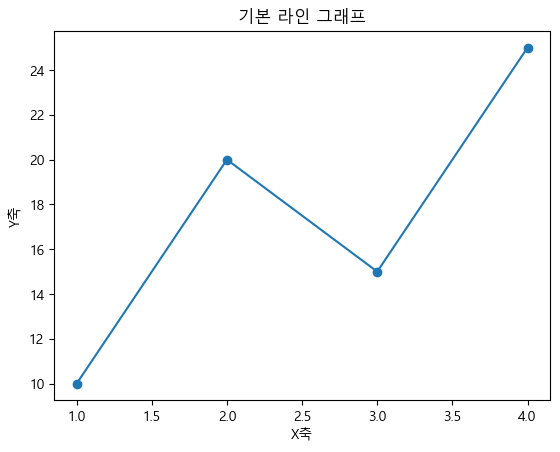

In [645]:
import matplotlib.pyplot as plt

# 예시 데이터
x = [1, 2, 3, 4]
y = [10, 20, 15, 25]

# 진짜 딱 기본이다 얘들만 있으면 된다 느낌 사실 marker='o'도 없어도 됨 ㅋ (진짜 퓨어한 기본은)
plt.plot(x, y, marker='o')
plt.title("기본 라인 그래프")
plt.xlabel("X축")
plt.ylabel("Y축")
plt.show()

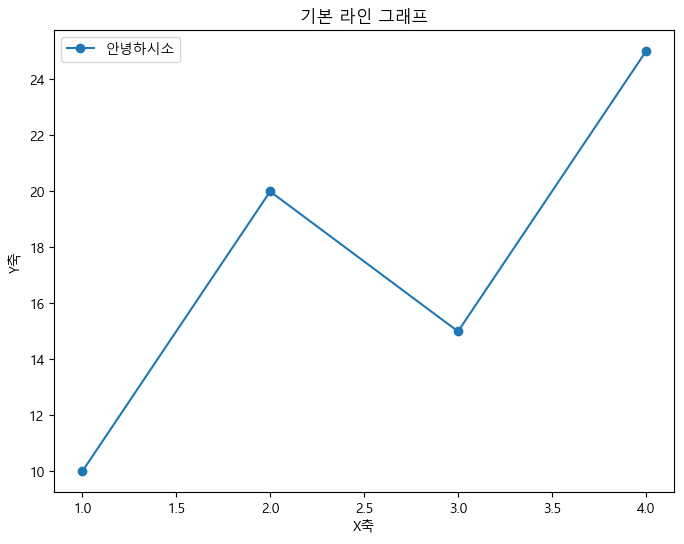

In [646]:
import matplotlib.pyplot as plt

# 예시 데이터
x = [1, 2, 3, 4]
y = [10, 20, 15, 25]

plt.figure(figsize=(8,6))
plt.plot(x, y, marker='o', label="안녕하시소")
plt.title("기본 라인 그래프")
plt.xlabel("X축")
plt.ylabel("Y축")
# plt.legend("안녕하시소. 이렇게 쓰면 하나만 잘리겠지 크기때문에 그럴 때는 plot 안에 넣으면 됩니다 그리고 legend")
plt.legend()
plt.show()

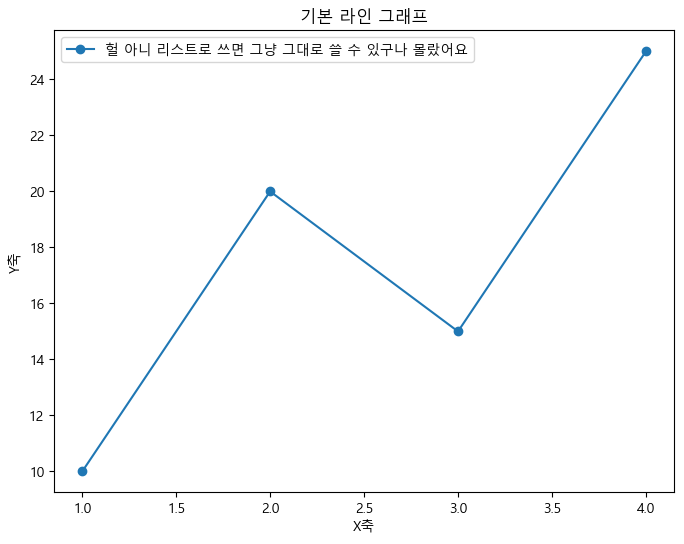

In [647]:
import matplotlib.pyplot as plt

# 예시 데이터
x = [1, 2, 3, 4]
y = [10, 20, 15, 25]

plt.figure(figsize=(8,6))
plt.plot(x, y, marker='o')
plt.title("기본 라인 그래프")
plt.xlabel("X축")
plt.ylabel("Y축")
plt.legend(["헐 아니 리스트로 쓰면 그냥 그대로 쓸 수 있구나 몰랐어요"])
plt.show()

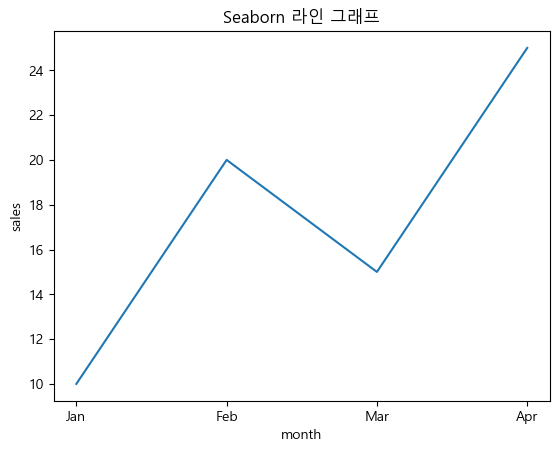

In [648]:
import seaborn as sns       # sns는 데이터프레임 친화적이드아
import pandas as pd

# 샘플 데이터프레임
df = pd.DataFrame({
    'month': ['Jan','Feb','Mar','Apr'],
    'sales': [10, 20, 15, 25]
})

sns.lineplot(x='month', y='sales', data=df)
plt.title("Seaborn 라인 그래프")
plt.show()

1. 선형 그래프 (Line Plot)
**언제?** 시간(혹은 순서)에 따른 **추세/변화**를 보고 싶을 때.

초보가 가장 많이 하는 실수 중 하나가 라인플롯을 아무데나 쓰는 거다.

- 라인플롯은 시간이나 순서가 있을 때만 의미가 있다
- x축이 랜덤한 범주인데 선으로 이으면 존재하지 않는 흐름을 만든다
- 날짜는 문자열이면 먼저 datetime으로 바꾼다. (`pd.to_datetime` 후 x축 정렬을 보장하도록)


In [649]:
day  = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
sales = [10, 12, 9, 13, 15, 14, 11]
df = pd.DataFrame({"day": day, "sales": sales})

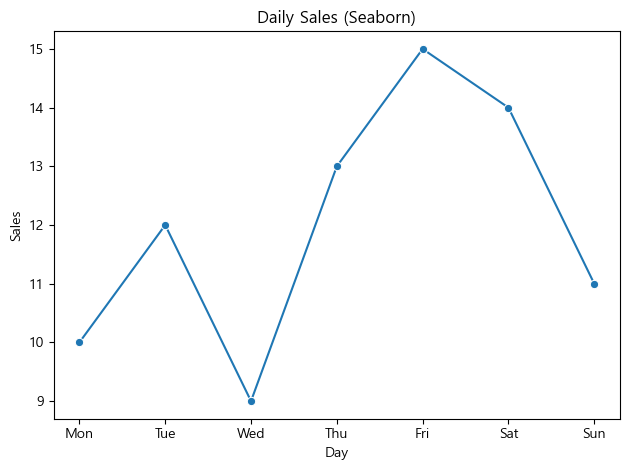

In [650]:
#seaborn
sns.lineplot(data=df, x="day", y="sales", marker="o")
plt.title("Daily Sales (Seaborn)")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

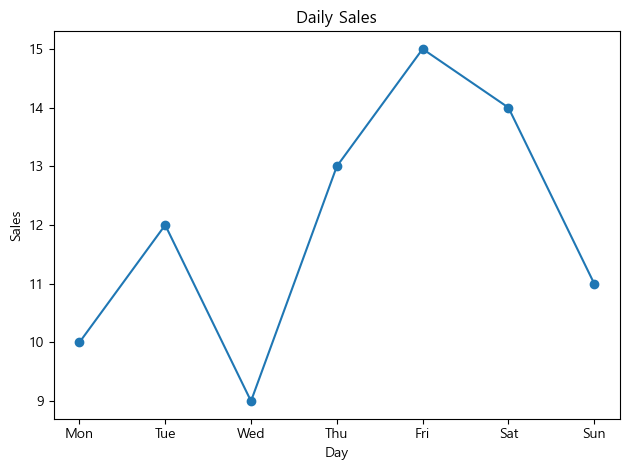

In [651]:
#Matplotlib
plt.plot(day, sales, marker="o")
plt.title("Daily Sales")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

2. 막대 — 빈도(개수) 비교 (countplot)
**언제? 범주**별 **건수/빈도** 비교.

- **성별**이 남/여 몇 **명**인지
- **등급**별 승객 **수**가 어떤지
- **도시**별 고객 **수**가 어떤지

**핵심 포인트**

- countplot은 말 그대로 개수다
- 내부적으로는 value_counts를 막대로 보여주는 느낌이다

In [652]:
basket = pd.DataFrame({"fruit": ["Apple","Banana","Apple","Cherry","Apple","Banana"]})

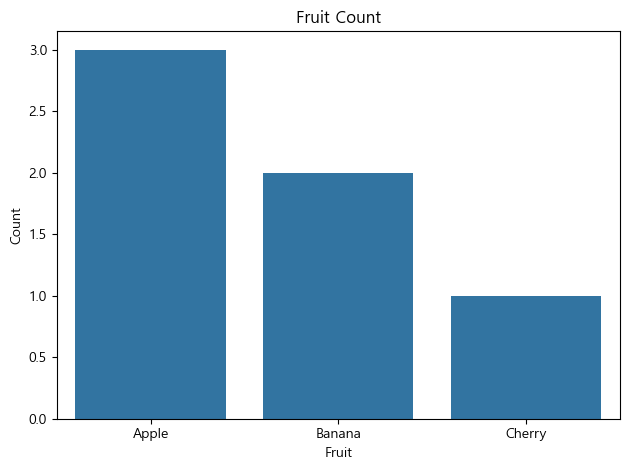

In [653]:
#Seaborn (권장)
order = basket['fruit'].value_counts().index  # 내림차순
sns.countplot(data=basket, x="fruit", order=order)
plt.title("Fruit Count")
plt.xlabel("Fruit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

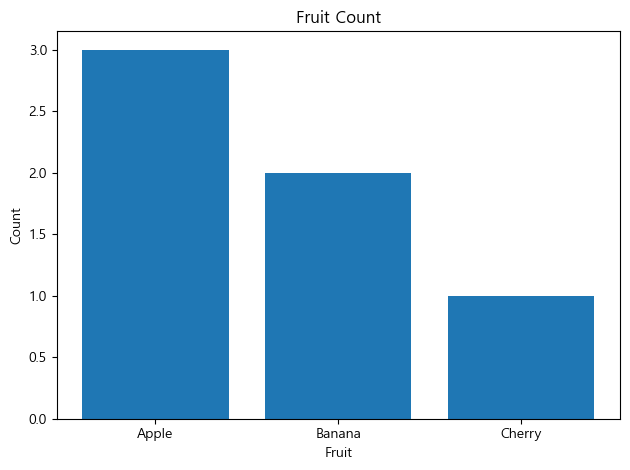

In [654]:
# Matplotlib (집계 후)
counts = basket["fruit"].value_counts().sort_values(ascending=False)
plt.bar(counts.index, counts.values)
plt.title("Fruit Count")
plt.xlabel("Fruit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

3. 막대 — 평균/비율 비교 (barplot)
**언제?** 그룹(**범주형**) **평균**(연속형) 또는 **비율**(0/1) 비교.

- **등급**별 평균 요금 **비교**
- **성별** 생존률 **비교**
- **그룹**별 합격률 **비교**

**barplot이 보여주는 것**

- barplot은 막대 높이가 보통 평균이다. 그리고 기본적으로 요약 통계와 함께 오차막대를 그릴 수 있다. 오차막대는 요약이 원본 데이터를 얼마나 잘 대표하는지에 대한 힌트다.
    - 오차막대가 길다? —> 불확실/변동이 크다
    - 오차막대가 짧다? —> 추정이 안정적이다
- 초보 단계에서는 오차막대를 빼고 평균 자체를 비교하는 감부터 잡는 게 좋다. Seaborn은 `errorbar=None`으로 오차막대를 숨길 수 있다.

**0과 1로 된 값은 평균이 비율이 된다**

- 예를 들어 survived가 0과 1로만 되어 있다면
    - 평균 = (1의 개수) / (전체 개수)
    - 즉 평균이 생존률이다

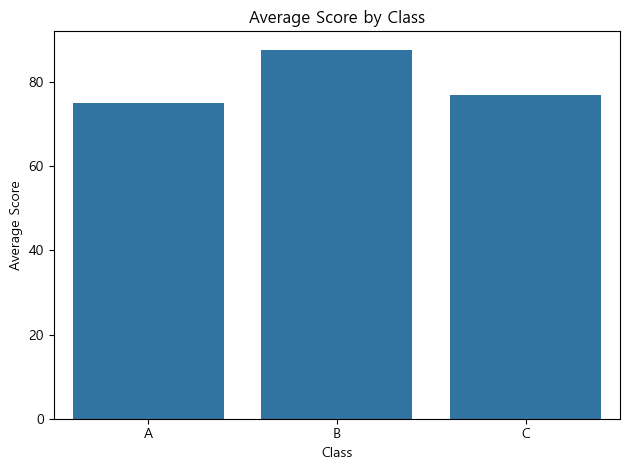

In [655]:
#예 A: 평균 비교
df = pd.DataFrame({
    "class": ["A","A","A","B","B","B","C","C"],
    "score": [80, 75, 70, 88, 85, 90, 78, 76]
})
# errorbar 옵션은 오차막대이고, 95% 신뢰구간를 가진다. None을 줄 경우 값 숨김
sns.barplot(data=df, x="class", y="score", errorbar=None)  # 기본: 평균
plt.title("Average Score by Class")
plt.xlabel("Class")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()

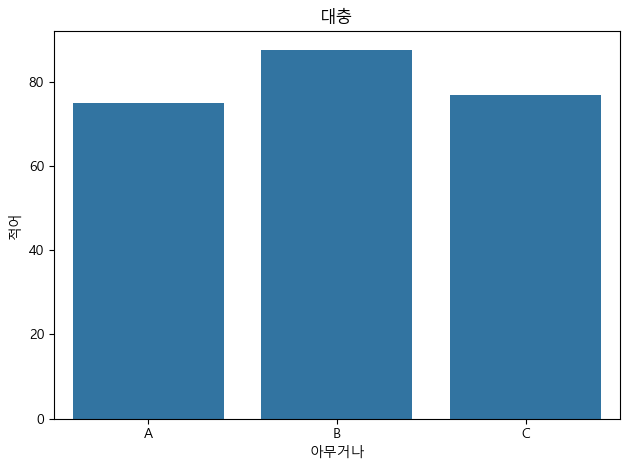

In [656]:
sns.barplot(data=df, x='class', y='score', errorbar=None)
plt.title("대충")
plt.xlabel("아무거나")
plt.ylabel("적어")
plt.tight_layout()
plt.show()

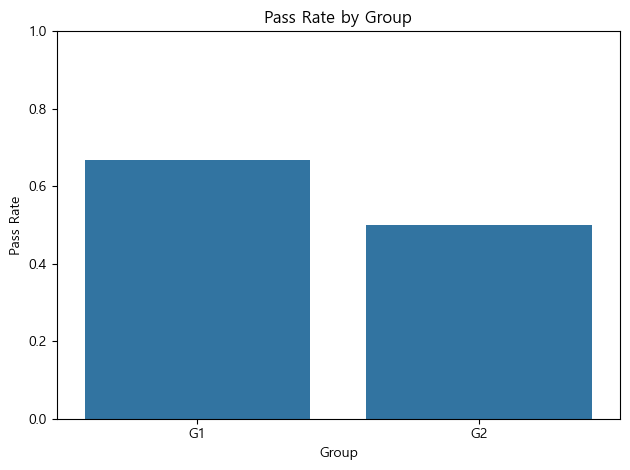

In [657]:
#예 B: 비율(0/1 평균=비율)
df = pd.DataFrame({
    "group": ["G1","G1","G1","G2","G2","G2","G2"],
    "passed": [1, 0, 1, 1, 1, 0, 0]   # 0/1
})
ax = sns.barplot(data=df, x="group", y="passed", errorbar=None)
plt.title("Pass Rate by Group")
plt.xlabel("Group")
plt.ylabel("Pass Rate")
plt.ylim(0,1)           #예림이 ㅋㅋㅋㅋ y limit (세로를 0~1로 고정)
plt.tight_layout()
plt.show()


In [658]:
#Matplotlib 대안: 그룹별 평균/비율을 직접 집계한 뒤 plt.bar로 그리기.

4. 산점도 (Scatter Plot) (키/몸무게)
**언제?** **두 수치형 변수** 사이의 **관계/상관/이상치**.

- **나이**가 많을수록 **요금**이 비싼가
- **공부시간**이 길수록 **점수**가 오르나
- **키**가 크면 **몸무게**도 큰가

**산점도 해석 포인트**

- 점 구름이 오른쪽 위로 올라가면 양의 관계
- 점 구름이 오른쪽 아래로 내려가면 음의 관계
- 아무 패턴이 없으면 관계가 약하다
- 점이 너무 겹치면 alpha로 투명도를 줘야 한다

In [659]:
df = pd.DataFrame({
    "height": [160,165,170,175,180,168,172],
    "weight": [ 55, 60, 65, 72, 80, 58, 67],
    "sex":    ["F","M","M","M","M","F","F"]
})

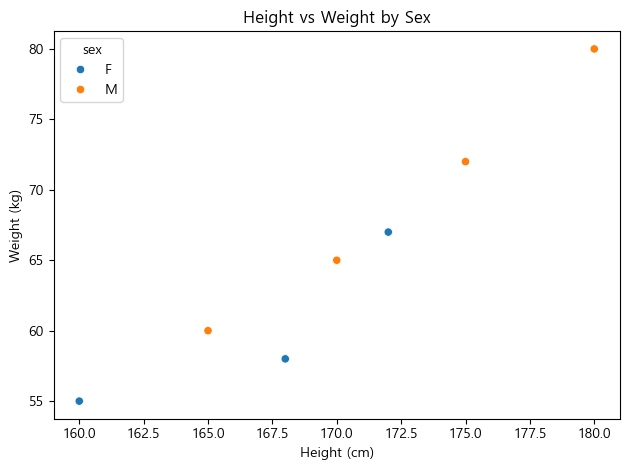

In [660]:
#Seaborn
sns.scatterplot(data=df, x="height", y="weight", hue="sex")
plt.title("Height vs Weight by Sex")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.tight_layout()
plt.show()

5. 히스토그램 (Histogram)
**언제?** **수치형 변수**의 **분포 모양**(몰림/꼬리/다봉성).

- **나이**가 한쪽으로 몰려 있나
- **요금**이 대부분 낮고 일부만 엄청 비싼가
- **점수**가 두 개의 봉우리를 가지나

**히스토그램이 알려주는 것**

- 히스토그램은 데이터를 구간으로 나눠서, 각 구간에 몇 개가 들어있는지 세는 그래프다. bin 개수를 바꾸면 모양이 달라진다.
- Seaborn의 histplot은 분포를 보여주는 기본 도구이고, 필요하면 KDE(커널 밀도 추정)같은 부드러운 곡선을 추가할 수도 있다.

**해석 체크리스트**

- 중심이 어디냐: 대략 어디에 가장 많이 몰렸나
- 퍼짐이 어느 정도냐: 넓게 퍼졌나 좁게 몰렸나
- 꼬리가 한쪽으로 길냐: 오른쪽 꼬리(큰 값)만 길면 이상치 후보가 있을 수 있다
- 봉우리가 하나냐 여러 개냐: 여러 개면 다른 집단이 섞였을 수 있다

In [661]:
scores = [55,60,62,65,70,72,75,78,80,82,85,88]
df = pd.DataFrame({"score": scores})

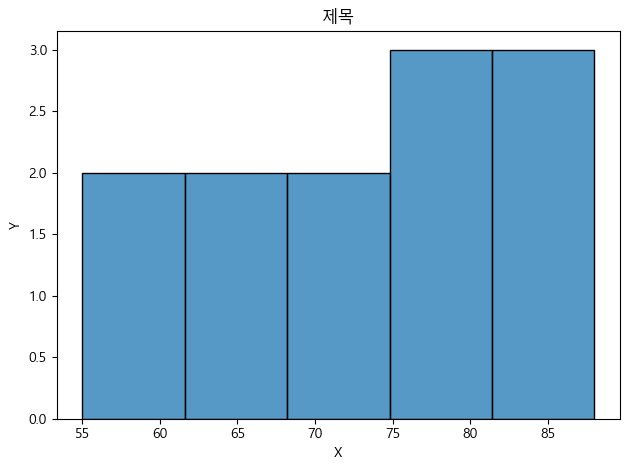

In [662]:
sns.histplot(data=df, x='score')    # bins=8, kde=True 해도 됨
plt.title("제목")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

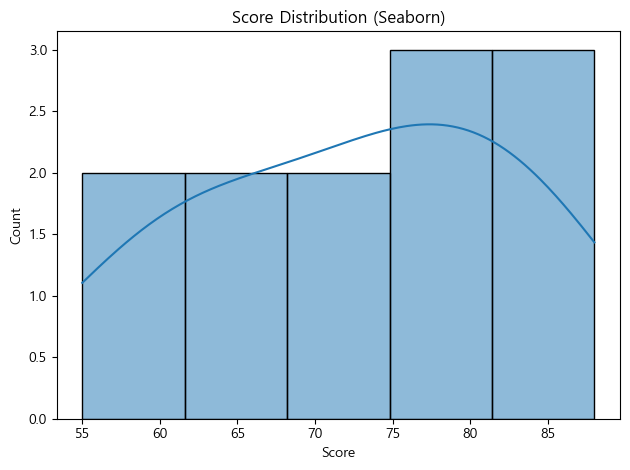

In [663]:
#Seaborn
sns.histplot(data=df, x="score", bins=5, kde=True)
plt.title("Score Distribution (Seaborn)")
plt.xlabel("Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

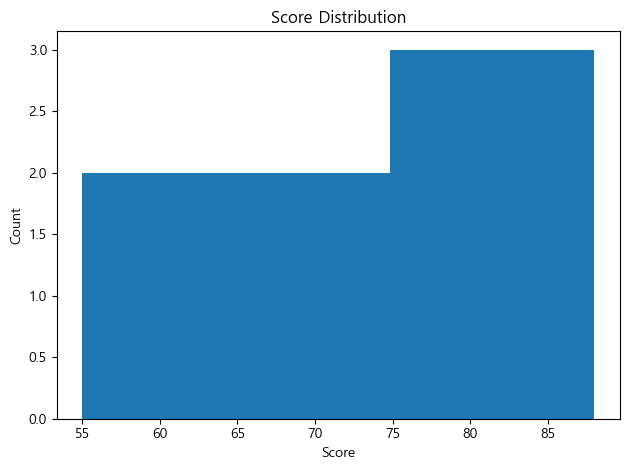

In [664]:
#Matplotlib
plt.hist(scores, bins=5)
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [665]:
#팁: bin 수에 따라 모양이 달라집니다(너무 적거나 많으면 왜곡).

6. 박스플롯 (Boxplot)
**언제?** **그룹별 분포**의 **중앙값/사분위/이상치** 확인(박스), **분포 형태**까지(바이올린).

- 그룹별로 분포가 다른지 보고 싶다
- 평균 하나로 비교하면 이상치 때문에 왜곡될 것 같다
- 중앙값과 퍼짐을 같이 보고 싶다

**박스플롯을 읽는 법**

- 가운데 선: 중앙값
- 박스: 중간 50퍼센트 구간
- 튀어나온 점: 이상치 후보

In [666]:
df = pd.DataFrame({
    "class": ["A","A","A","B","B","B","C","C","C","C"],
    "score": [ 70, 75, 80, 65, 68, 78, 60, 62, 64, 66]
})

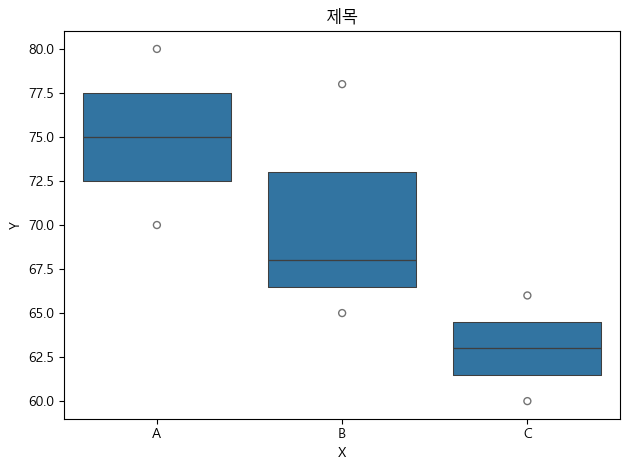

In [667]:
sns.boxenplot(data=df, x='class', y='score')
plt.title("제목")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()










# 70 -> 20 해서 이상치 확확 달라짐





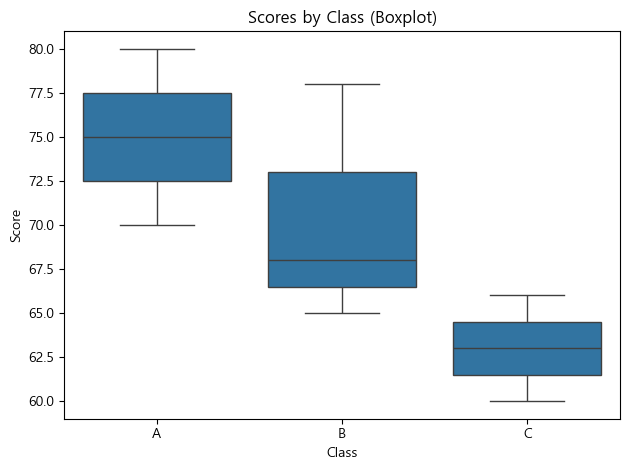

In [668]:
#Seaborn (Box)
sns.boxplot(data=df, x="class", y="score")
plt.title("Scores by Class (Boxplot)")
plt.xlabel("Class")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

7. 히트 맵(heatmap)
**언제?** 범주형과 범주형 관계는 교차표와 heatmap

- **성별**과 **음료 선호**는 관련이 있나
- **지역**과 **구매 여부**는 관련이 있나
- **탑승항구**와 **생존 여부**는 관련이 있나

**핵심 흐름**

- 교차표를 만든다
- 비율로 바꾼다
- heatmap으로 색칠한다

**비율로 바꾸는 이유**

- 단순 개수는 표본 수가 큰 그룹이 무조건 커 보일 수 있어서, 그룹 내부 비율로 비교하는 게 더 공정하다
- `normalize='index'`는 행(각 그룹) 기준으로 정규화해 행별 합이 1이 되도록 만든다.

In [669]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

survey = pd.DataFrame({
    "성별": ["남", "남", "남", "남", "여", "여", "여", "여", "여", "남", "여", "남"],
    "음료": ["커피", "커피", "차", "커피", "차", "차", "커피", "차", "커피", "차", "커피", "커피"]
})


In [670]:
# 1) 교차표 만들기 + 2) 비율로 바꾸기(행 기준) -> 퍼센트로 보기 좋게 * 100
# pd.crosstab()
ct = pd.crosstab(survey["성별"], survey["음료"]) 
ct

음료,차,커피
성별,,
남,2,4
여,3,3


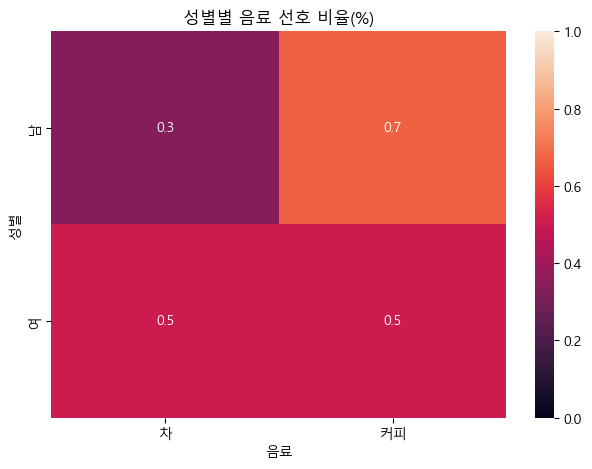

In [671]:
# 1) 교차표 만들기 + 2) 비율로 바꾸기(행 기준) -> 퍼센트로 보기 좋게 * 100
# pd.crosstab()
ct = pd.crosstab(survey["성별"], survey["음료"], normalize="index") 
# ct = pd.crosstab(survey["성별"], survey["음료"], normalize="index") * 100 #이거하면 vmax=100 (단위가 달라지니까)

# 3) heatmap으로 색칠하기
# annot=True: 각 칸에 숫자를 같이 표시
# fmt=".1f": 숫자를 소수 1자리로 표시
# vmin=0, vmax=100: 퍼센트 범위를 고정해서 색이 과장되지 않게 함
sns.heatmap(ct, annot=True, fmt=".1f", vmin=0, vmax=1)
plt.title("성별별 음료 선호 비율(%)")
plt.xlabel("음료")
plt.ylabel("성별")
plt.tight_layout()
plt.show()

## 7) Tips

### 7-1) 한 그래프를 완성하는 6가지 요소

- 제목: 무엇을 보여주는지
- x축 라벨: 기준이 무엇인지
- y축 라벨: 값이 무엇인지
- 단위: 명, 원, 비율 같은 것
- 범례: 색이 의미하는 그룹
- 정렬: 막대는 보통 내림차순이 읽기 쉽다

### 7-2) 결측치가 그래프에 미치는 영향

- 대부분의 Seaborn 그래프는 NaN을 자동으로 제외하고 그린다
    
    그래서 결측이 많으면 표본이 줄어든다
    
- 그룹별 결측 비율이 다르면 비교가 왜곡된다
    
    예: 남성의 나이 결측이 훨씬 많으면 남성 나이 분포가 실제와 달라 보일 수 있다
    
- 결측을 채울 때는 기록을 남겨야 한다
    
    EDA에서는 중앙값 채우기를 임시로 쓰기도 하지만, 그 사실을 적어야 한다

### 7-3) 범주가 많으면 상위 N개만 먼저 본다

범주가 30개 넘으면 처음엔 그래프가 지저분해져서 아무것도 안 보인다.

- 상위 10개만 먼저 보기
- 나머지는 Other로 묶기

### 7-4) 점이 너무 겹치면 이렇게 한다

산점도에서 점이 겹치면 패턴이 안 보인다.

- `alpha`를 낮춰 투명하게
- 점 크기 조절
- 데이터가 너무 많으면 샘플링(random sampling)

### 7-5) 색은 많이 쓰지 않는다

색을 많이 쓰면 더 좋아 보인다고 착각한다.

- 비교 그룹은 가능하면 2~4개 정도가 한 번에 읽기 좋다
- 범례가 너무 길어지면 정보가 아니라 잡음이 된다

8) Titanic 문제 세트

In [672]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"  # 또는 "AppleGothic", "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False
%matplotlib inline
titanic = pd.read_csv("train.csv")

In [673]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 문제 1. 성별(`sex`)에 따라 **생존률(`survived`)**이 달랐는가?

- 문제 : 성별별 생존률 비교
- 권장 그래프 : 범주×연속[0/1] → 막대그래프 → `barplot`
- **왜 이 그래프?** 이진변수 평균이 곧 **비율**이므로 막대 높이가 바로 생존률을 의미.

- 아래 내용을 미리 다 복붙해둬서 걍 접어두고 문제만 봅시다~
- 못접네 걍 합시다

In [674]:
#[1단계: 숫자로 먼저 확인] .value_counts

In [675]:
t_01 = titanic.groupby('Sex')['Survived'].value_counts()       # mean 추가? 평균으로 비교해야하니까
t_01    # 얘는 성별 별 생존율의 평균 비교

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [676]:
#[2단계: barplot으로 시각화]
#survived가 0/1이면 평균이 곧 비율(생존률)이라서 barplot이 딱 맞는다.

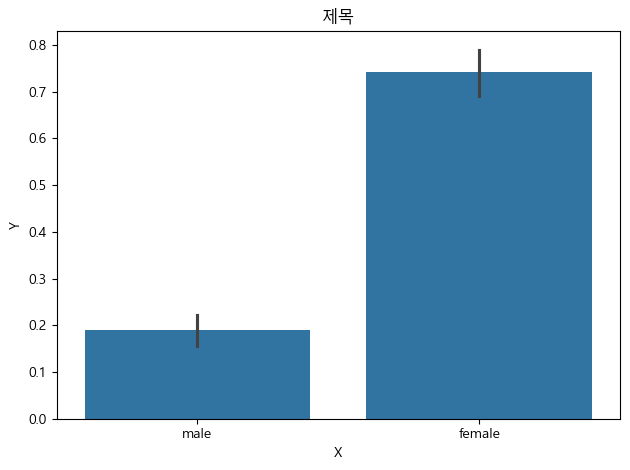

In [677]:
sns.barplot(data=titanic, x='Sex', y='Survived')
plt.title("제목")
plt.xlabel("X")
plt.ylabel("Y")
# plt.ylim(0,1)   # 아 예림씨 ㅋㅋㅋ 선 제거~ 오차라인
plt.tight_layout()
plt.show()

#해석 :
# 여성의 생존율이 더 높군요

In [678]:
#[3단계: 해석 포인트]
#막대가 높은 성별이 생존률이 더 높다
#value_counts로 표본 수를 같이 보고, 표본이 적은 그룹이면 결론을 조심스럽게 말한다

### 문제 2. 객실 등급(`class`)에 따라 **요금(`fare`)** 분포는 어떻게 다른가?

- 문제 : 객실 등급별 요금 분포
- 권장 그래프 : 범주×연속 → 박스/바이올린 → `boxplot` 또는 `violinplot`
- **왜 이 그래프?** 평균 막대만 보이면 outlier 영향이 큼. **중앙값/사분위/이상치**까지 한 번에 확인 가능.

In [679]:
#[1단계: 요약 통계로 감 잡기] 

#요약통계. summary..아 아니지 describe

In [680]:
titanic.groupby('Pclass')['Fare'].value_counts()       #분포는~ valuecounts

Pclass  Fare   
1       26.5500    15
        52.0000     7
        0.0000      5
        30.0000     5
        30.5000     5
                   ..
3       15.5500     1
        17.4000     1
        21.6792     1
        22.0250     1
        22.5250     1
Name: count, Length: 255, dtype: int64

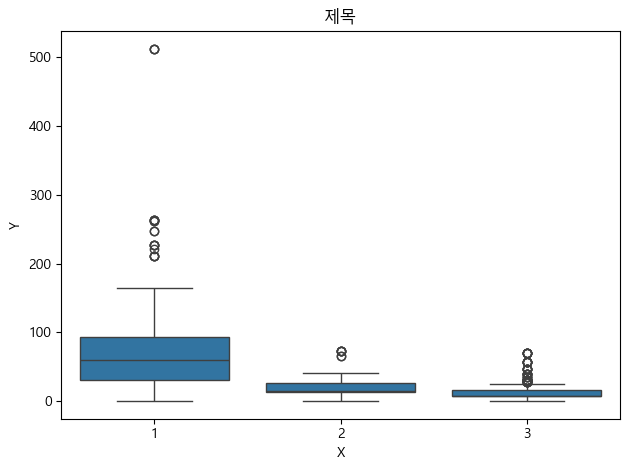

In [681]:
#[2단계: boxplot로 분포 비교]
#범주×연속 → boxplot

sns.boxplot(data=titanic, x='Pclass', y='Fare')
plt.title("제목")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

#아이고!! 이상치들이 있네
# 저 위에 있는거 하나때문에 지금 애들 눌려서 1도 안보인다 우짜냐~ (제거해야겠지?)
# 근데 대충은 보이긴하네요

In [682]:
#[3단계: 해석 포인트]
# - 평균 막대만 보면 이상치(outlier)에 의해 왜곡될 수 있다
# - 박스플롯은 중앙값과 퍼짐(사분위) + 이상치까지 함께 본다
# - 높은 등급일수록 요금이 비싸 보이지만, 이상치가 많은지도 같이 확인한다



### 문제 3. 승객 **나이(`age`)**는 어떤 분포인가?

- 문제 : 나이 분포 파악
- 권장 그래프 : 연속 단변량 → 히스토그램 → `histplot`(+KDE)
- **왜 이 그래프?** 연속형 1개 변수의 **분포 모양**(봉우리, 꼬리, 다봉성) 파악에 최적

In [683]:
#[1단계: 숫자로 먼저 확인] 

#확인? describe? 아니면 어....shape? 다 해~ 그냥
# 아 분포면 value_counts  nomalize? 붙이면 비율로 볼 수 있을
# 근데 나이면 숫자니까 그냥 describe? 
titanic['Age'].describe().round(2)

#아하~ 그렇군요 와 80세가 가장 많고 평균은 29.7~

count    714.00
mean      29.70
std       14.53
min        0.42
25%       20.12
50%       28.00
75%       38.00
max       80.00
Name: Age, dtype: float64

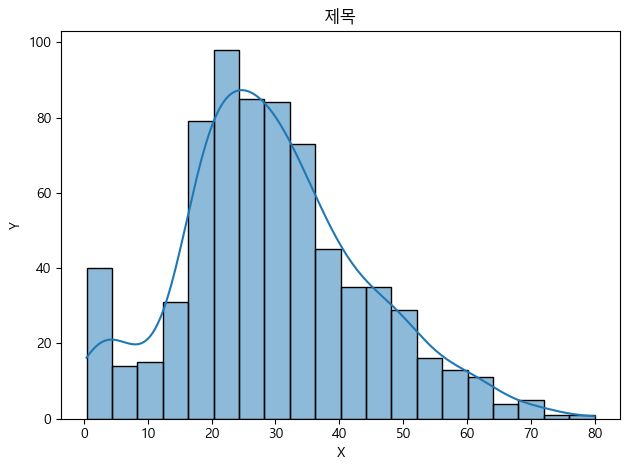

In [684]:
#[2단계: histplot(+kde)로 시각화]
# 히스토그램은 구간(bin)별로 관측치 수를 세어서 분포를 보여주고, 
# kde=True면 부드러운 분포 곡선을 같이 얹을 수 있다.

sns.histplot(data=titanic, x='Age', kde=True)   #아 뭘 까먹엇네 싶었던이 bins군요 근데 이쁘니까 ㄱㅊ
plt.title("제목")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

#2030이 굉장히 많군요 (약간 왼쪽) 아기를 데리고 탄 사람이 많거나 아니면 이상한 값이 많거나 둘 중 하나겠군요

In [685]:
#[3단계: 해석 포인트]

# - 어디에 몰려 있는지(봉우리), 꼬리가 긴지(치우침), 이상치가 있는지 느낌을 잡는다
# - 결측치가 많으면 그래프에 포함되는 표본이 줄어드니 `isna().sum()`을 같이 확인한다

### 문제 4. **나이(`age`)**와 **요금(`fare`)** 사이에 어떤 패턴이 있는가? (생존 여부 포함)

- 문제 : **나이 vs 요금** 관계
- 권장 그래프 : 연속×연속 → 산점도 → `scatterplot` (+ `hue="survived"`)
- **왜 이 그래프?** 두 연속형의 **상관/클러스터/이상치**를 점 구름으로 쉽게 확인 가능

In [686]:
# [1단계: 숫자로 먼저 확인]
titanic['Age'].value_counts()
titanic['Age'].describe().round()

titanic['Fare'].value_counts()
titanic['Fare'].describe().round()

count    891.0
mean      32.0
std       50.0
min        0.0
25%        8.0
50%       14.0
75%       31.0
max      512.0
Name: Fare, dtype: float64

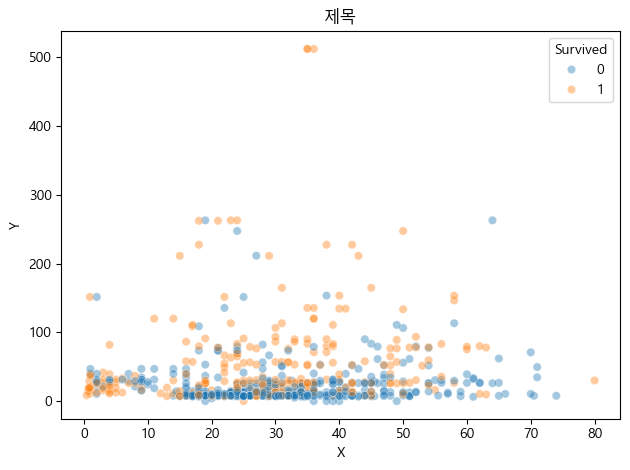

In [687]:
# **[2단계: scatterplot(+hue)로 시각화]**

# - 산점도는 두 수치형 변수 관계를 보는 기본 도구고, `hue`를 주면 그룹별 패턴도 같이 볼 수 있다.

sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Survived', alpha=0.4)
plt.title("제목")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

## 개뭉쳐있다 alpha 주면 투명도가 올라가겠죠?
## 아래에 파랑 개많고 0세는 산 아이가 많군요? 전체적으로 2030이 죽었어. 헐... 대박
# 그래도 중간? 가격이 높은 중간층에 파랑보다 노랑이 더 많은듯? 아래 파랑이 엄청 뭉쳐있어서 
# 기적적으로 80세에 생존하신 분이 계시네요 대박 

In [688]:
# **[3단계: 해석 포인트]**

# - 생존(1) 점들이 특정 요금대/나이대에 더 몰려 보이는지 관찰
# - 점이 많이 겹치면 `alpha`로 투명도를 낮추는 게 기본
# - 결측 때문에 drop되는 행이 생기니 1단계에서 결측도 같이 확인

### 문제 5. 객실 등급(`class`)에 따라 **생존률**이 어떻게 달랐는가? (교차표 + heatmap)

- 질문 :
- 문제 : 등급×생존 비율
- 권장 그래프 : 범주×범주 → 히트맵 → 교차표(`crosstab`) **행 기준 비율** → `heatmap`
- **왜 이 그래프?** **비율**을 색으로 표시하면 등급 간 차이를 **한눈에** 비교 가능.

In [689]:
# **[1단계: 숫자로 먼저 확인]**

# - 개수(표본)부터 보고, 그 다음 행 기준 비율(등급별 생존 비율)로 본다. 
# `normalize="index"`는 각 행 합이 1이 되도록 정규화하는 옵션

# 교차표는 좀 어렵네 어어
ct = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index')
#어? 쉽네 pd.crosstab만 있으면? 오..
ct

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


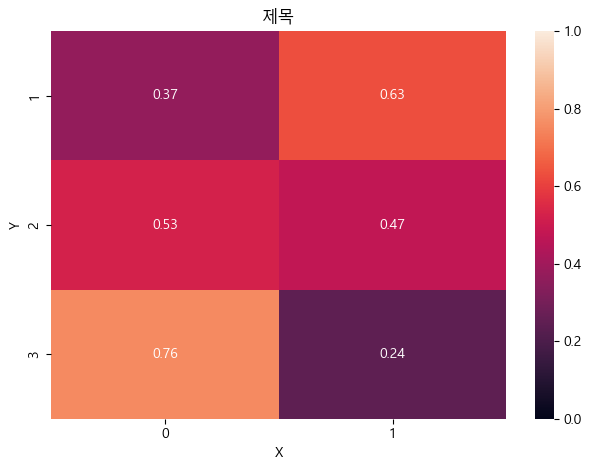

In [690]:
# **[2단계: heatmap으로 시각화]**

# - heatmap의 `annot`는 칸에 숫자를 찍어주고, `fmt`는 그 숫자 포맷이다.

sns.heatmap(ct, annot=True, fmt='.2f', vmin=0, vmax=1)     # 이미 x축 y축 위에 있으니까 data=titanic 안쓰고 바로 ct ㅋ
# 0.~~ 라서 두자리수까지 보는 게 나을 것 같아서 수정~ 쉽네 음음
plt.title("제목")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

## 자! 밝을수록 높은 비율을 가진다. 높은 클래스일수록 생존율이 높군요 

In [691]:
# **[3단계: 해석 포인트]**

# - 색이 진한 칸이 비율이 높은 쪽
# - 비율만 보면 위험할 수 있으니 `ct_count`(개수)도 반드시 같이 보고 말한다

### 문제 6. 탑승항(`embarked`)별 **승객 수**와 **생존률**을 각각 어떻게 보여줄까?

- 문제 : 탑승항별 인원 & 생존률
- 권장 그래프 : 두 시각화 비교 → `countplot`(개수) + `barplot(y='survived')`(비율)
- **왜 이 그래프?** **개수**와 **비율**은 다른 질문. 각각 최적 그래프가 다름.

In [692]:
# [1단계: 숫자로 먼저 확인]
titanic['Embarked'].describe()
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [693]:
# **[2단계: countplot(개수) + barplot(생존률)]**

# - `countplot`은 범주형 구간별 관측치 개수를 막대로 보여주는 그래프

# 별에 두개 붙었으니까~ 일단 groupby 어 agg인가? 일단 해봐

em_agg = titanic.groupby('Embarked').agg(
    em_count = ('PassengerId', 'count'),
    em_mean = ('Survived', 'mean')
).sort_values('em_count').round(2)

#일단 나오긴 했는데 이게 맞나?...어..

# 어!! 전혀아니네? ㅋㅋㅋㅋㅋㅋ 그냥 그래프 두개 보는 거구나

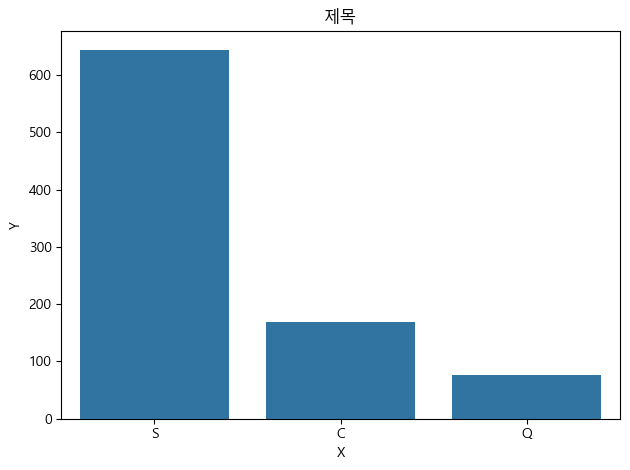

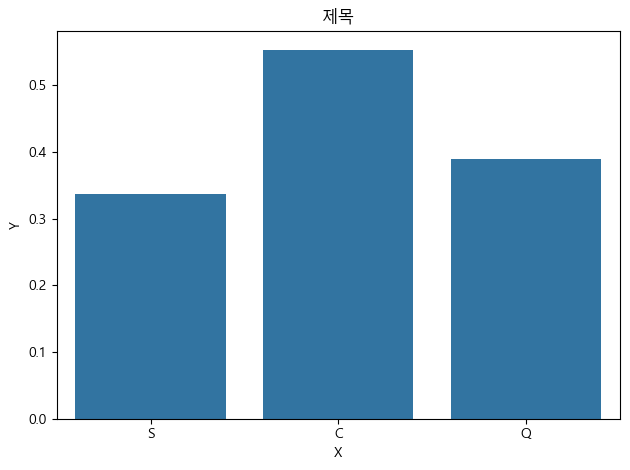

In [699]:
## 자~ 다시해보죠?

em_1 = sns.countplot(data=titanic, x='Embarked')    # 아 countplot이라 y가 필요가 업군요 어차피 빈도라
plt.title("제목")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

em_2 = sns.barplot(data=titanic, x='Embarked', y="Survived", errorbar=None)
plt.title("제목")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

In [ ]:
# **[3단계: 해석 포인트]**

# - 승객 수(개수)와 생존률(비율)은 질문이 다르다
# - 특정 탑승항의 표본이 적으면 생존률이 과하게 높거나 낮게 보일 수 있다

### 문제 7. Titanic의 **수치형 변수들끼리 관계(상관)**를 한눈에 파악하려면 어떻게 보여줄까? (상관행렬 + heatmap)

- 문제 : 수치형 컬럼만 골라 **피어슨 상관행렬** 계산 후 **히트맵**으로 시각화
- 권장 그래프 : 상관행렬 → `heatmap`
- **왜 이 그래프?** 여러 수치 변수의 **쌍별 상관(-1~1)**을 **색과 수치**로 직관적으로 비교할 수 있음.

<Axes: >

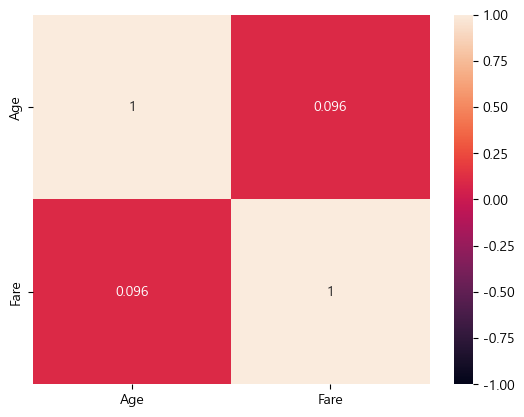

In [725]:
# **[1단계: 숫자로 먼저 확인]**

# - 상관행렬은 수치형 컬럼들 간 상관계수를 계산한 표다. 
# pandas `corr()는` Pearson/Kendall/Spearman 등을 지원한다.

#자. 수수는 scatterplot pairplot 상관관계니까 scatter이겠죠
#수.. 수치형만? 흠.. 뭐뭐있더라 아나 두개네 다시 가려

# int_col = ['']

#아 피어슨 상관행렬 계산 후? 어? 나이거 어젠가 python용 어 뭐더라 어.......
# 일단 r은 cor zzz인데 ㅋㅋㅋ zz보고아야겟다 TIL.. 아... 
# 아하 ㅋ corr()

corrr = titanic[['Age', 'Fare']].corr()
corrr
sns.heatmap(corrr, annot=True, vmin=-1, vmax=1)  # 아 문제에 -1 1로 하라고 ㅋㅋㅋ

#이거맞아요?..... 뭐 1은 본인이니까 1 나오는데 0.09면 엄청 상관관계가 낮다는 건디 흠..... 비상인데?

#내가 잘못 푼 걸수도 있으니까 일단 정석 풀이도 한번 봐야겠다 이거

In [722]:
num = df.select_dtypes(include="number")
corr = num.corr(method="pearson")
corr

,score
score,1.0


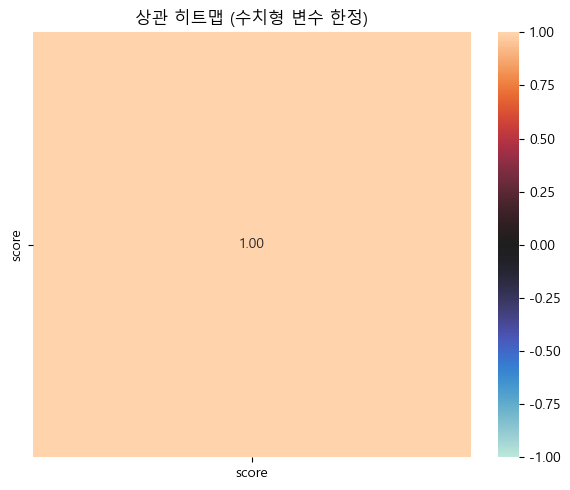

In [726]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0)
plt.title("상관 히트맵 (수치형 변수 한정)")
plt.tight_layout()
plt.show()

#음?? score과 score이 완벽하게 상관이 있다 (당연함. 본인임.)
# 어?? 내가 위에서 뭐 잘못햇나? 모지....

In [ ]:
# **[2단계: heatmap으로 시각화]**

# - `survived`가 0/1이면 평균이 곧 비율(생존률)이라서 barplot이 딱 맞는다.

In [ ]:
# **[3단계: 해석 포인트]**

# - 1에 가까우면 함께 증가하는 경향, -1에 가까우면 반대로 움직이는 경향
# - 상관이 높다고 원인이 되는 건 아니다(EDA에서 관계 힌트로만 사용)
# - 선형이 아닌 관계가 많을 것 같으면 `method="spearman"`도 한 번 비교해볼 수 있다